# SHAP

`SHAP` is a library for interpreting neural networks, and we can use it to help us with tabular data too! I wrote a library called `FastSHAP` which ports over the usabilities of it. Let's do a walkthrough of what each does and how it works.

* Note: I only have it ported for tabular data

First let's install our libraries:

In [ ]:
!pip install fastinference fastai

## How to use it

FIrst we need to train a model. We'll quickly train our `ADULTS` model now:

In [2]:
from fastai.tabular.all import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [4]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]

In [5]:
splits = IndexSplitter(list(range(800,1000)))(range_of(df))
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)
dls = to.dataloaders()

In [6]:
learn = tabular_learner(dls, layers=[200,100], metrics=accuracy)
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.369559,0.482648,0.835000,00:07


Now let's go through some example usage!

# `fastinference`

First let's import the interpretability module:

In [7]:
from fastinference.tabular import *

And now we'll make a `ShapInterpretation` object. It expects your `Learner` along with some test data to look at and any keywords that `SHAP` can use. If you don't pass anything in it will use a subset of your validation data:

In [ ]:
exp = ShapInterpretation(learn, df.iloc[:100])

Let's look at the various methods available to us:

## Decision Plot

The decisio plot will visualize a model's decision by looking at the "SHAP" values for a particular row. If you plot too many samples at once it can make your plot illegible.

Let's look at the tenth row of our dataframe:

In [ ]:
df.iloc[10]

age                           23
workclass                Private
fnlwgt                    529223
education              Bachelors
education-num                 13
marital-status     Never-married
occupation                   NaN
relationship           Own-child
race                       Black
sex                         Male
capital-gain                   0
capital-loss                   0
hours-per-week                10
native-country     United-States
salary                      <50k
Name: 10, dtype: object

As we can see, our `y` value is '<50k'. Let's look at how the model performed and what could have been influencing our result into an *opposite* direction

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


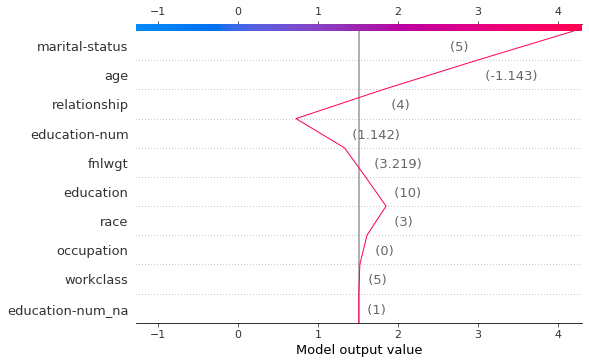

In [ ]:
exp.decision_plot(class_id=0, row_idx=10)

And now if we turn this the other way around:

Classification model detected, displaying score for the class >=50k.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


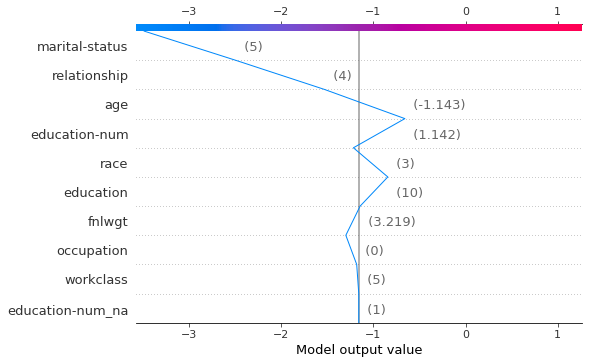

In [ ]:
exp.decision_plot(class_id=1, row_idx=10)

We can visually see what variables were having the largest impact on the model. (Note, it shows the pre-processed datapoints)

## Dependency Plots

Dependency plots use the same variable on the x and y axis, with the y axis being the "SHAP" values of it. We can pass in a variable name and a particular class ID and it will show the dependency plot for all of the test data we passed in:

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


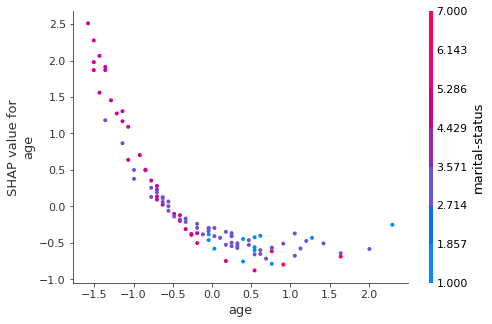

In [ ]:
exp.dependence_plot('age', class_id=0)

Classification model detected, displaying score for the class >=50k.
(use `class_id` to specify another class)


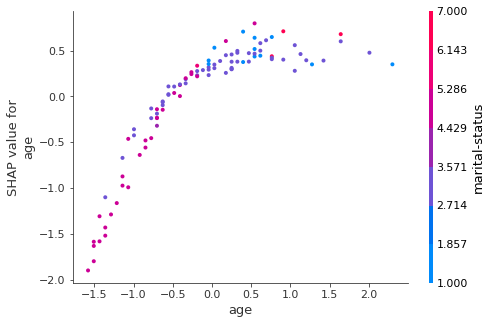

In [ ]:
exp.dependence_plot('age', class_id=1)

## Force Plot

Fore plots will visualize the "SHAP" values with an added force layout. We can see how each variable at a certain value affects whether it falls into class A or class B:

In [ ]:
exp.force_plot(class_id=1)

Classification model detected, displaying score for the class >=50k.
(use `class_id` to specify another class)


## Summary Plot

Similar to feature importance, it shows the average impoact of a particular value on model performance:

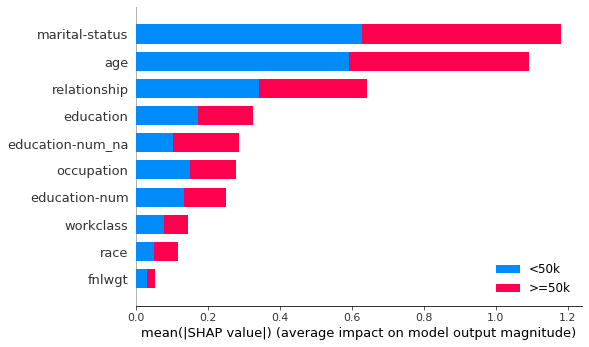

In [ ]:
exp.summary_plot()

## Waterfall Plot

And finally the waterfall plot. It'll explain a single prediction. It can accept a `row_index` and a `class_id` which defualts to the first one. It can be an integer or string representation of the class we want to look at. Let's look at that row 10 again:

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


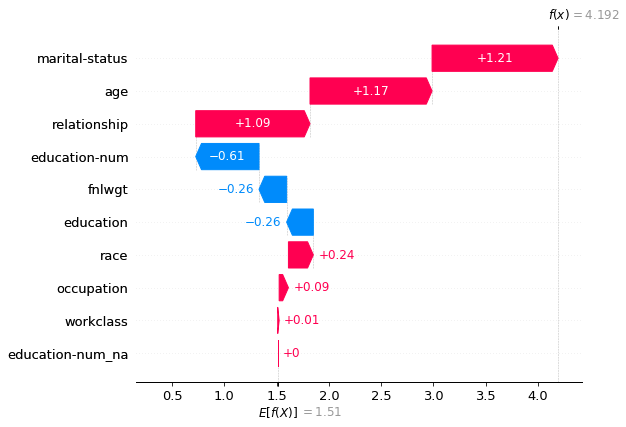

In [ ]:
exp.waterfall_plot(row_idx=10, class_id='<50k')